In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [4]:
df = pd.read_csv('train.csv')

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Text(0.5, 1.0, 'Target_variable')

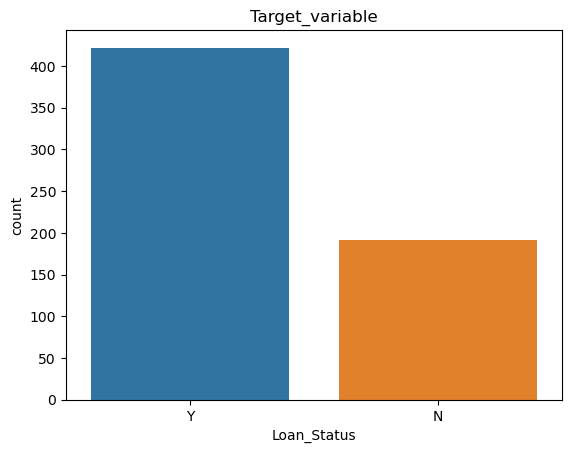

In [22]:
sns.countplot(df,x='Loan_Status',hue='Loan_Status')
plt.title('Target_variable')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [26]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [38]:
num_column = df.select_dtypes(include=['number'])

<Axes: >

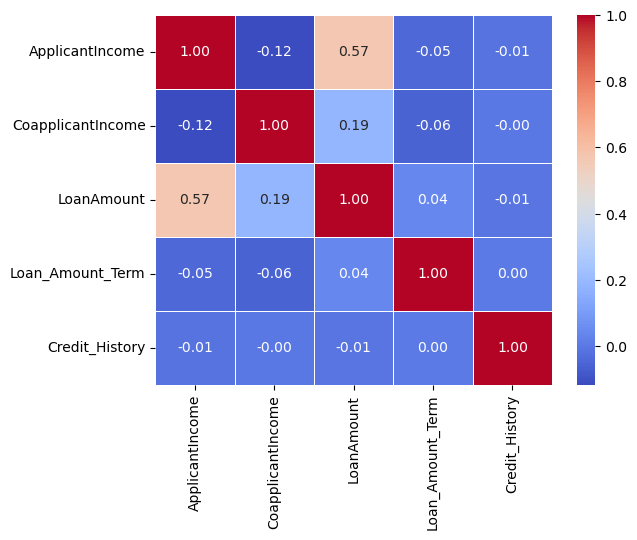

In [42]:
corr = num_column.corr()

sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.5,fmt='.2f')

Text(0, 0.5, 'Loan_Amount')

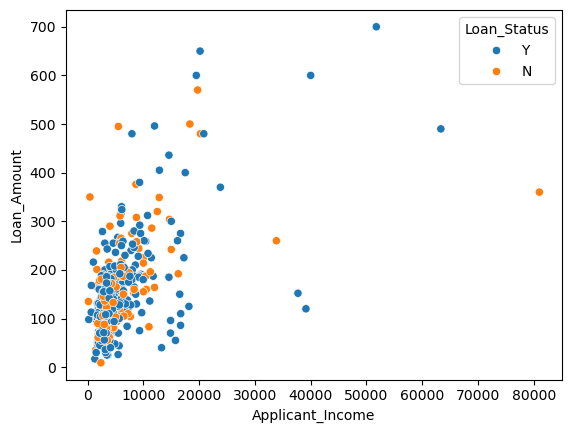

In [64]:
sns.scatterplot(df,x='ApplicantIncome',y='LoanAmount',hue='Loan_Status')
plt.xlabel('Applicant_Income')
plt.ylabel('Loan_Amount')


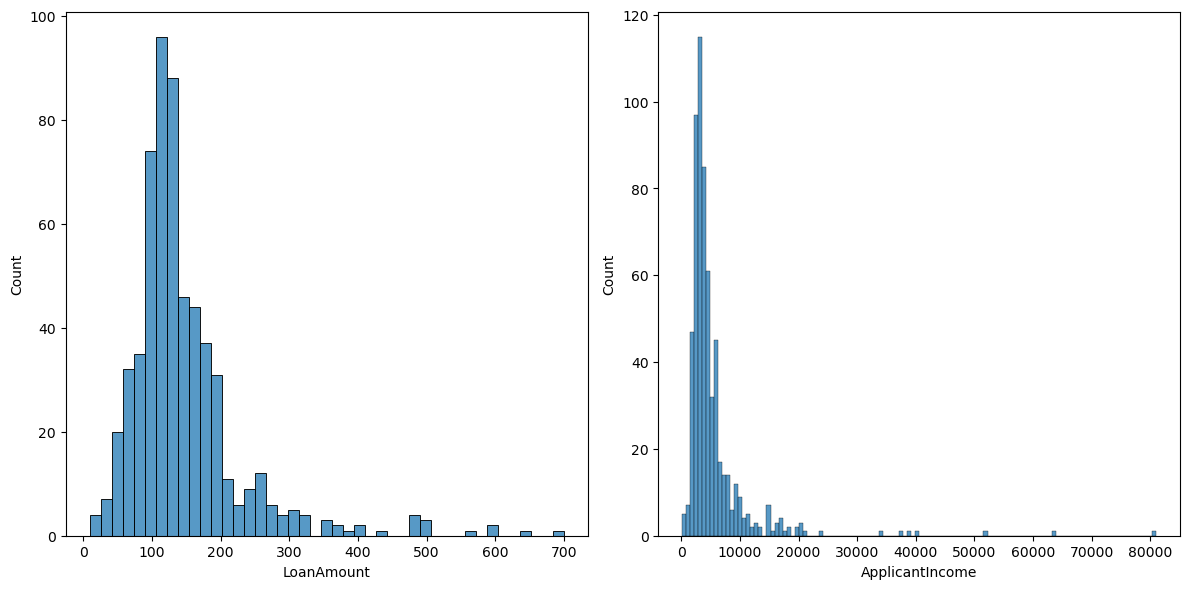

In [72]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df,x='LoanAmount')

plt.subplot(1,2,2)
sns.histplot(df,x='ApplicantIncome')
plt.tight_layout()

In [82]:
# Identify missing values
df.isnull().sum()
    

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [114]:
categories = df.select_dtypes(include=['object'])
cat = categories.columns

# Fill missing values with the mode for each column
for col in cat:
    df[col] = df[col].fillna(df[col].mode()[0])

In [120]:
numerical_col = ['LoanAmount','Loan_Amount_Term','Credit_History']

# Handle missing values for numerical columns using median
for col in numerical_col:
    df[col] = df[col].fillna(df[col].median())

In [122]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [126]:
from sklearn.preprocessing import LabelEncoder
# Label encoding for 'Loan_Status' (target variable)
label_encoder = LabelEncoder()
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


In [150]:
# Encoding Categorical features
# df = pd.get_dummies(df, columns=['Gender', 'Married','Education','Dependents', 'Self_Employed', 'Property_Area'], drop_first=True)

# have to convert the boolean values into int type i will do that later

In [138]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,True,False,False,False,False,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,0,True,True,False,True,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,1,True,True,False,False,False,False,True,False,True
3,2583,2358.0,120.0,360.0,1.0,1,True,True,True,False,False,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,1,True,False,False,False,False,False,False,False,True


In [140]:
# Feature Engineering
# Create additional features (e.g., Income ratio)
df['Income_Ratio'] = df['ApplicantIncome'] / df['LoanAmount']
df['Coapplicant_Income_Ratio'] = df['CoapplicantIncome'] / df['LoanAmount']

# Check the new features
df.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Income_Ratio,Coapplicant_Income_Ratio
0,5849,0.0,128.0,360.0,1.0,1,True,False,False,False,False,False,False,False,True,45.695312,0.00000
1,4583,1508.0,128.0,360.0,1.0,0,True,True,False,True,False,False,False,False,False,35.804688,11.78125
2,3000,0.0,66.0,360.0,1.0,1,True,True,False,False,False,False,True,False,True,45.454545,0.00000
3,2583,2358.0,120.0,360.0,1.0,1,True,True,True,False,False,False,False,False,True,21.525000,19.65000
4,6000,0.0,141.0,360.0,1.0,1,True,False,False,False,False,False,False,False,True,42.553191,0.00000


In [156]:
boolean_columns = df.select_dtypes(include=['bool']).columns

# Convert boolean columns to integer type
for col in boolean_columns:
    df[col] = df[col].astype(int)

# Verify the data types after conversion
print(df.dtypes)

# Display the first few rows
df.head()

ApplicantIncome               int64
CoapplicantIncome           float64
LoanAmount                  float64
Loan_Amount_Term            float64
Credit_History              float64
Loan_Status                   int32
Gender_Male                   int32
Married_Yes                   int32
Education_Not Graduate        int32
Dependents_1                  int32
Dependents_2                  int32
Dependents_3+                 int32
Self_Employed_Yes             int32
Property_Area_Semiurban       int32
Property_Area_Urban           int32
Income_Ratio                float64
Coapplicant_Income_Ratio    float64
dtype: object


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Income_Ratio,Coapplicant_Income_Ratio
0,5849,0.0,128.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1,45.695312,0.00000
1,4583,1508.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,0,0,35.804688,11.78125
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1,45.454545,0.00000
3,2583,2358.0,120.0,360.0,1.0,1,1,1,1,0,0,0,0,0,1,21.525000,19.65000
4,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1,42.553191,0.00000


In [158]:
# Define the features (X) and target (y)
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [160]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



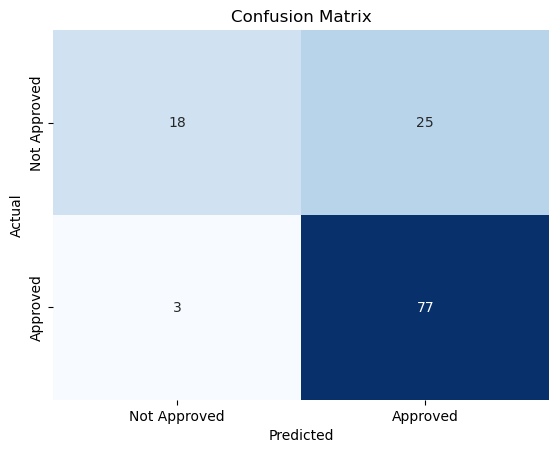

In [162]:
# Predictions on the test set
y_pred = rf.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
